In [1]:
import numpy as np
import cv2

In [ ]:
############################### 3.1 Exercise #####################################

############################ 3.1.1 and 3.1.2 ####################################

In [2]:
#Reading RGB image
img1 = cv2.imread('parrots.jpg')

cv2.imshow('Original image',img1)
print(img1)
print(img1.shape)

img1_red=img1.copy()
img1_red[:,:,2]=255
cv2.imshow('Original image in red',img1_red)


#Reading grey-scale image
img2 = cv2.imread('parrots.jpg',0)
cv2.imshow('Gray-scale image',img2)
print(img2)
print(img2.shape)

cv2.waitKey(0)
cv2.destroyAllWindows()


[[[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [  0   4   1]
  [ 20   0   1]
  [  5   0   2]]

 [[255 255 255]
  [254 254 254]
  [253 253 253]
  ...
  [  0  12   6]
  [ 11   0   0]
  [  3   2   4]]

 [[254 254 254]
  [252 252 252]
  [250 250 250]
  ...
  [ 31  83  76]
  [ 13  12  14]
  [  0   1   1]]

 ...

 [[241 241 241]
  [233 233 233]
  [220 220 220]
  ...
  [251 251 251]
  [255 255 255]
  [252 252 252]]

 [[244 244 244]
  [239 239 239]
  [231 231 231]
  ...
  [250 250 250]
  [252 252 252]
  [254 254 254]]

 [[249 249 249]
  [245 245 245]
  [239 239 239]
  ...
  [253 253 253]
  [255 255 255]
  [255 255 255]]]
(490, 980, 3)
[[255 255 254 ...   2   1   1]
 [255 254 253 ...   7   0   3]
 [254 252 250 ...  75  13   1]
 ...
 [241 233 220 ... 251 255 252]
 [244 239 231 ... 250 252 254]
 [249 245 239 ... 253 255 255]]
(490, 980)


2025-10-28 14:26:29.670 python[72213:5277482] +[IMKClient subclass]: chose IMKClient_Modern
2025-10-28 14:26:29.670 python[72213:5277482] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [3]:
############################ 3.1.3 ####################################

cv2.imwrite('parrots_gray_test.jpg',img2)


############################ 3.1.4 ####################################

#img1 = cv2.imread('parrots.jpg')

height=img1.shape[0]
width=img1.shape[1]
print(height,width)

test=img1.copy()

#Making frame
test[:75,:] = 255
test[:,:75] = 255
test[height-75:,:] = 255
test[:,width-75:] = 255
##### TO DO PART ####
# Change test in order to create a frame. 

cv2.imshow('Frame test',test)
cv2.imwrite('parrots_frame_test.jpg',test)

cv2.waitKey(0)
cv2.destroyAllWindows()

490 980


In [4]:
############################ 3.1.5 ####################################
#######TO DO PART ####
# creat a random noise matrix with the same shape of the image with values between 0 - 50.
noise=np.random.random((height,width))
noise=noise*50
noise=noise.astype(int)
print(noise)

cv2.imwrite('noise.jpg',noise)
noise=cv2.imread('noise.jpg',0)
cv2.imshow('Noise',noise)

cv2.waitKey(0)
cv2.destroyAllWindows()


[[26 47 15 ... 23 41  9]
 [21 18 41 ... 44 43  5]
 [41 49 42 ... 12  9  5]
 ...
 [ 6 47 40 ... 33 16 41]
 [41 36 18 ... 38 13  8]
 [46  4 33 ... 17  9  0]]


[ WARN:0@168.507] global loadsave.cpp:1063 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


In [5]:
############################ 3.1.6 ####################################
## To Do Part##
# add the noise to your picture and display it
noiseimg = noise + img2

result=cv2.imshow('Image noisy',noiseimg)
cv2.imwrite('parrots_noisy_test.jpg', noiseimg)

cv2.waitKey(0)
cv2.destroyAllWindows()    


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_image(image, title='Image'):
    # Display image using matplotlib
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

############################ 3.2.1 ####################################
#### To do part ###
def mean_filter(image):
    height = image.shape[0]
    width = image.shape[1]
    img = image.copy()
    for i in range(height):
        for j in range(width):
            if (i > 1 and j > 1 and i < height - 1 and j < width - 1):
                a=image[i-1,j-1]/9
                b=image[i,j-1]/9
                c=image[i-1,j]/9
                d=image[i,j+1]/9
                e=image[i+1,j]/9
                f=image[i+1,j+1]/9
                g=image[i+1,j-1]/9
                h=image[i-1,j+1]/9
                k=image[i,j]/9
                n=a+b+c+d+e+f+g+h+k
                img[i,j]=n

    return cv2.imshow('Mean Filtered Image', img)

############################ 3.2.2 ####################################
def median_filter(image):
    height= image.shape[0]
    width= image.shape[1]
    img_prime = image.copy()
    for i in range(height):
        for j in range(height):
            if (i > 1 and j > 1 and i < height - 1 and j < width - 1):
                a =[image[i, j], image[i+1, j+1], image[i-1, j-1],image[i, j+1], image[i+1, j], image[i-1, j], image[i+1, j-1], image[i-1, j+1], image[i, j-1]]
                img_prime[i,j]=np.median(a)
    return cv2.imshow('Median Filtered Image', img_prime)

In [8]:
############################ 3.2.3 ####################################
window=9

# Apply the mean filter
ksize = (window, window)  # Size of the filter kernel
opencv_mean_image = cv2.blur(img2, ksize)


# Apply the median filter
ksize = window  # Size of the filter kernel (window size)
opencv_median_image = cv2.medianBlur(img2, ksize)

cv2.imshow('OpenCV filtered image (mean)',opencv_mean_image)
cv2.imshow('OpenCV filtered image (median)',opencv_median_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
import cv2

#captures all the frames
video = cv2.VideoCapture('tom_and_jerry.mp4')

#Check if video opened successfully
if (video.isOpened()== False): 
    print("Error opening video stream or file")

#fram/sec in video and duration of it
fps = video.get(cv2.CAP_PROP_FPS)
print('frames per second =',fps)

#total number of frames
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print('total number of frames =',length)
print('duration of the video (in sec) =',length/fps)

video.set(cv2.CAP_PROP_POS_FRAMES, 1002)
ret, frame = video.read()
cv2.imshow('Frame 1002', frame)

cv2.waitKey(0)
cv2.destroyAllWindows()

frames per second = 25.0
total number of frames = 3646
duration of the video (in sec) = 145.84


In [10]:
############################ 4.1.2 ####################################
 
# Read until video is completed
while(video.isOpened()):
  # Capture frame-by-frame
  ret, frame = video.read()
  if ret == True:
  #### To Do ######
    # define the canny filter and apply it on the image.
    cv2.imshow('Original Video', frame)
    # Convert to grayscale
    framegray = cv2.Canny(frame, 25, 250)
    cv2.imshow('Canny Filter', framegray)

    if cv2.waitKey(1) == 27:         # wait for ESC key to exit, 27 is the escape key number
      break
 
  # Break the loop
  else: 
    break
# When everything done, release the video capture object
video.release()
# Closes all the frames
cv2.destroyAllWindows()


In [2]:
! pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached markdown-3.9-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached markdown_it_py-

In [4]:
! pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 42.0 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


In [7]:
! pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl (37.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 47.9 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]


In [8]:
############################### 5.1 Exercise #####################################

############################ 5.1.2 ####################################

# import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import cv2

## Loading MNIST dataset
(train_ds, train_labels), (test_ds, test_labels) = tf.keras.datasets.mnist.load_data()

## MNIST dataset images are 28*28, and they are between 0-255. 
#Preprocessing part 1 
train_ds = train_ds / 255.0
test_ds = test_ds / 255.0

## Transforming labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [9]:
############################ 5.1.3 ####################################

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False ## Not trainable weights

## Preprocessing part 2
train_ds = tf.image.grayscale_to_rgb(tf.expand_dims(train_ds, -1))
train_ds = tf.image.resize(train_ds, (32, 32))
train_ds = preprocess_input(train_ds)

test_ds = tf.image.grayscale_to_rgb(tf.expand_dims(test_ds, -1))
test_ds = tf.image.resize(test_ds, (32, 32))
test_ds = preprocess_input(test_ds)


In [10]:
############################ 5.1.4 ####################################

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
############################ 5.1.5 ####################################

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(10, activation='softmax')

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

start = datetime.datetime.now()

history = model.fit(train_ds, train_labels, epochs=5, validation_split=0.2, batch_size=32, callbacks=[es])

score = model.evaluate(test_ds, test_labels, batch_size=32)
x_valid_output_images = model.predict(test_ds)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)



Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 100s 66ms/step - accuracy: 0.2833 - loss: 1.9266 - val_accuracy: 0.4209 - val_loss: 1.5469
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 104s 69ms/step - accuracy: 0.4363 - loss: 1.4756 - val_accuracy: 0.4378 - val_loss: 1.4698
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 107s 71ms/step - accuracy: 0.4734 - loss: 1.3711 - val_accuracy: 0.5004 - val_loss: 1.3045
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 115s 77ms/step - accuracy: 0.5185 - loss: 1.2798 - val_accuracy: 0.5590 - val_loss: 1.1932
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 120s 80ms/step - accuracy: 0.5734 - loss: 1.1732 - val_accuracy: 0.6072 - val_loss: 1.1165
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.6000 - loss: 1.1052
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step


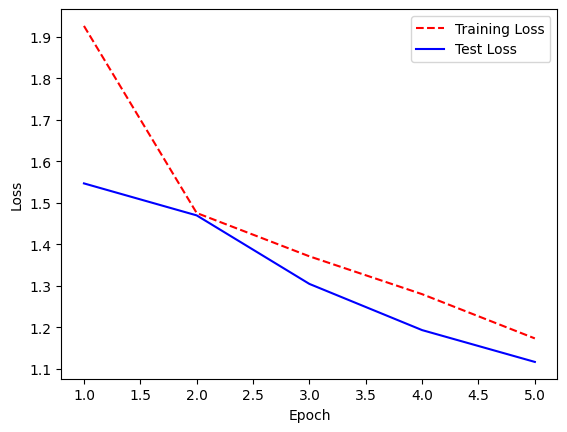

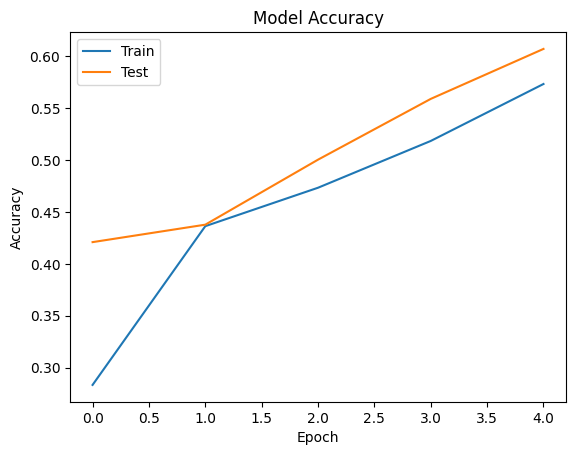

Training time: 0:09:50.954744
Test score: 1.1051723957061768
Test accuracy: 0.6000000238418579


In [13]:
############################ 5.1.6 ####################################

# Visualize loss history
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

end = datetime.datetime.now()
elapsed = end - start
print('Training time:', str(elapsed))
print('Test score:', score[0])
print('Test accuracy:', score[1])

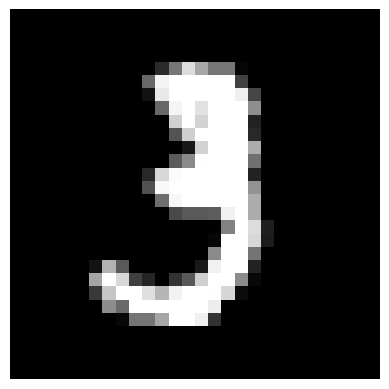

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Actual class: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted class: 9


In [15]:
############################ 5.1.7 ####################################

## Loading MNIST dataset
(train_ds, train_labels), (test_ds, test_labels) = tf.keras.datasets.mnist.load_data()

## Displaying an image
image_index = 10
plt.imshow(train_ds[image_index], cmap='gray')
plt.axis('off')
plt.show()

## Rescaling images
train_ds = train_ds / 255.0
test_ds = test_ds / 255.0

## Remaining code for model training and evaluation
# (Please copy the code provided in the previous response here)

# Use the image for prediction
input_image = tf.image.grayscale_to_rgb(tf.expand_dims(train_ds[image_index], -1))
input_image = tf.image.resize(input_image, (32, 32))
input_image= preprocess_input(input_image)
input_image = tf.expand_dims(input_image, axis=0)


## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

predicted_label = model.predict(input_image)
predicted_class = tf.argmax(predicted_label, axis=1).numpy()[0]

actual_class = train_labels[image_index]

print("Actual class:", actual_class)
print("Predicted class:", predicted_class)